$$MDI505-HW1$$

$$Chunyan Yuan$$

---

Question1
Plot ($c_s$ ) vs ($1/M_{at}$) and find the best-fit line.


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data = pd.read_csv("specific-heat-and-atomic-mass-metals.csv", index_col=0, header=0)

X = 1 / data.iloc[:, 0].values
Y = data.iloc[:, 1].values

In [10]:
phi = np.mat(np.zeros([data.shape[0], 2]))
phi[:, 0] = np.ones(data.shape[0]).reshape(-1, 1)
phi[:, 1] = X.reshape(-1, 1)

theta_ls = np.linalg.lstsq(phi, Y, rcond=None)[0]

In [11]:
x_fit = np.linspace(min(X), max(X), 100)
y_fit = theta_ls[0]+theta_ls[1]*x_fit

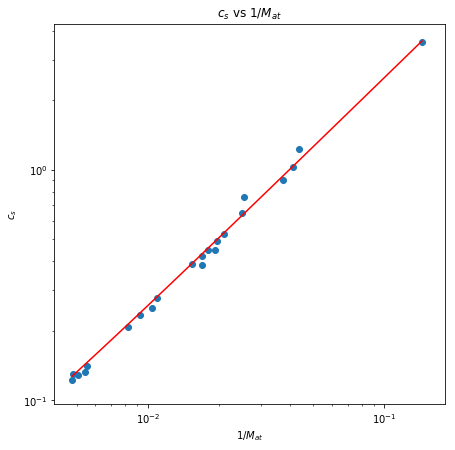

In [12]:
plt.figure(figsize=[7, 7])
plt.scatter(1/data.iloc[:, 0], data.iloc[:, 1])
plt.plot(x_fit, y_fit, color="red")
plt.xscale('log')
plt.yscale('log')
plt.title(r"$c_s$ vs $1/M_{at}$")
plt.xlabel(r"$1/M_{at}$")
plt.ylabel(r"$c_s$")
plt.show()

What is the slope of this fitted line?

In [13]:
print(theta_ls)

[7.41360635e-03 2.50063343e+01]


The slope is 2.5.

Based on the Dulong–Petit rule, is this value expected?

According to Dulong-Petit rule:
$$
C_m = \frac{dU}{dT} = 3R = 25 JK^{-1}mol^{-1}
$$
This value is expected.

Now consider $Be$, which is a very light metal. It has to $c_s = 1.825 J g^{−1} K^{−1}$  and $ M_{at} = 9.012 g mol^{−1}$. What is its molar heat capacity $C_m$? How does the value for Be fit the rest of the data? 


$$
c_s =\frac{C_m}{M_{at}}
$$

$$
C_m = c_s \times M_{at}
$$

$$
= 1.825 J g^{−1} K^{−1} \times 9.012 g mol^{−1} 
$$

$$
= 16.4469 JK^{-1}mol^{-1}
$$

The molar heat capacity of Be does not fit the rest of the data.



---

Q2. Given the relation $\rho\varpropto T_n$, plot ρ against T on a log–log plot and find n.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv("Sr-resistivity-vs-temp.txt", sep="\t", header=0, index_col=None)
# print(data)

X_temperature = data.iloc[:, 0].values
Y_resistivity = data.iloc[:, 1].values
X_temperature_log = np.log10(X_temperature)
Y_resistivity_log = np.log10(Y_resistivity)

In [16]:
phi = np.mat(np.zeros([data.shape[0], 2]))
phi[:, 0] = np.ones(data.shape[0]).reshape(-1, 1)
phi[:, 1] = X_temperature_log.reshape(-1, 1)

theta_ls = np.linalg.lstsq(phi, Y_resistivity_log, rcond=None)[0]
print("theta_ls = " + str(theta_ls))

theta_ls = [-0.30892241  0.98465151]


In [17]:
x_fit = np.linspace(min(X_temperature_log), max(X_temperature_log), 100)
y_fit = theta_ls[0]+theta_ls[1]*x_fit

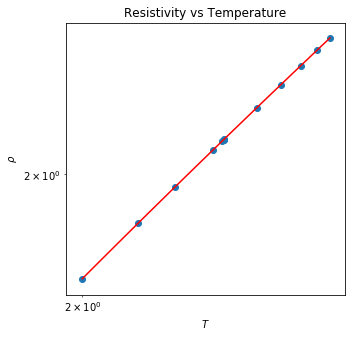

In [18]:
plt.figure(figsize=[5, 5])
plt.scatter(X_temperature_log, Y_resistivity_log)
plt.plot(x_fit, y_fit, color="red")
plt.xscale('log')
plt.yscale('log')
plt.title("Resistivity vs Temperature")
plt.xlabel(r"$T$")
plt.ylabel(r"$\rho$")
plt.show()

In [19]:
print("n =" + str(theta_ls[1]))

n =0.9846515102944575


n is 0.985

---

Q3. Given the resistivity of the alloy to be $\rho_{alloy}$ = CX(1 − X), determine the effective Nordheim coefficient C for Zn dissolved in Cu over this compositional range.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv("Cu-Zn-alloy-Nordheim.csv", header=0, index_col=None)
#print(data)

X = data.iloc[:, 0].values/100
Y = data.iloc[:, 1].values
X = X*(1-X)

In [22]:
phi = np.mat(np.zeros([data.shape[0], 2]))
phi[:, 0] = np.ones(data.shape[0]).reshape(-1, 1)
phi[:, 1] = X.reshape(-1, 1)

theta_ls = np.linalg.lstsq(phi, Y, rcond=None)[0]

theta_ls = [ 18.51543768 225.80726339]


In [23]:
x_fit = np.linspace(min(X), max(X), 100)
y_fit = theta_ls[0]+theta_ls[1]*x_fit

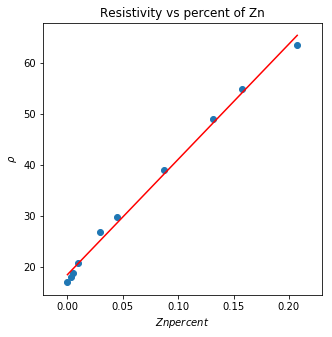

In [24]:
plt.figure(figsize=[5, 5])
plt.scatter(X, Y)
plt.plot(x_fit, y_fit, color="red")
plt.title("Resistivity vs percent of Zn")
plt.xlabel(r"$Zn percent$")
plt.ylabel(r"$\rho$")
plt.show()

In [29]:
print("Nordheim coefficient C for Zn dissolved in Cu is " , round(theta_ls[1], 4))

Nordheim coefficient C for Zn dissolved in Cu is  225.8073


---